<a href="https://colab.research.google.com/github/LuciusMelillo09/DataScience/blob/main/Unit3/LuciMeliU3Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
For my project, I decided to predict what my average accuracy in chess.com blitz games, as I'm curious how well I generally play.

In [5]:
!pip install "preliz"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 3.8 MB/s eta 0:00:00


In [6]:
import preliz as pz

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

In [8]:
data='https://raw.githubusercontent.com/LuciusMelillo09/DataScience/refs/heads/main/Unit3/My%20games%20-%20A4RookA3_all_2510011324.csv'
data2 = pd.read_csv(data)

In [9]:
data2

,userAccuracy,opponentAccuracy,gameUrl,gameId,timeClass,fen,userColor,userRating,opponent,opponentRating,opponentUrl,result,wonBy,date,openingUrl,opening,startTime,endTime,outcome,moveCount
0,100.00,97.19,https://www.chess.com/game/live/82741268487?re...,82741268487,blitz,rnbqk2r/pp2ppbp/3p1np1/8/2PNP3/2N2P2/PP4PP/R1B...,white,2309,mmg1983,2225,https://www.chess.com/member/mmg1983,win,abandoned,2023.07.10,https://www.chess.com/openings/Sicilian-Defens...,Sicilian Defense Open Prins Variation 5...g6 6...,15:16:28,15:17:24,7,abandoned
1,100.00,78.31,https://www.chess.com/game/live/83291763843?re...,83291763843,blitz,4kb1r/p1p2ppp/2Bp1n2/3Pp3/n1P5/5P2/PP3P1P/R1B1...,white,2221,Fenix_Xadrez,2215,https://www.chess.com/member/Fenix_Xadrez,win,resigned,2023.07.17,https://www.chess.com/openings/Old-Indian-Defe...,Old Indian Defense Tartakower Indian Variation...,0:14:38,0:16:12,14,resigned
2,100.00,55.83,https://www.chess.com/game/live/86920125637?re...,86920125637,blitz,rnbqk1nr/pp1pppQp/6p1/8/4P3/5N2/PPP2PPP/RNB1KB...,white,2263,DoctorAnxiety,2147,https://www.chess.com/member/DoctorAnxiety,win,resigned,2023.08.28,https://www.chess.com/openings/Sicilian-Defens...,Sicilian Defense Hyperaccelerated Dragon Fianc...,0:03:54,0:04:16,5,resigned
3,100.00,77.99,https://www.chess.com/game/live/88273868305?re...,88273868305,blitz,rn1qk2r/pp2bppp/2p2n2/3p2B1/3P4/2N1PN2/PPb2PPP...,black,2382,BernardGoesPlayChess,2290,https://www.chess.com/member/BernardGoesPlayChess,win,resigned,2023.09.12,https://www.chess.com/openings/Queens-Gambit-D...,Queens Gambit Declined Charousek Variation...6...,16:08:23,16:08:40,8,resigned
4,100.00,87.26,https://www.chess.com/game/live/98262913407?re...,98262913407,blitz,r1b1k2r/p2p1ppp/2p1p3/4n3/2P5/5B2/PP1NK1PP/R6R...,black,2449,Arglos100,2325,https://www.chess.com/member/Arglos100,win,resigned,2024.01.06,https://www.chess.com/openings/Sicilian-Defens...,Sicilian Defense Four Knights Variation...9.f4...,6:53:33,6:54:37,16,resigned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040,55.52,85.49,https://www.chess.com/game/live/108694210917?r...,108694210917,blitz,r1b2rk1/p2nppBp/2pp2pQ/7P/3P4/q1n5/2PN1PP1/1K1...,white,2453,GarbageDog10,2133,https://www.chess.com/member/GarbageDog10,checkmated,NaN,2024.05.06,https://www.chess.com/openings/Pirc-Defense-Ma...,Pirc Defense Main Line 4.Be3 Bg7 5.Qd2 O O,0:28:00,0:29:38,15,checkmated
2041,54.96,77.63,https://www.chess.com/game/live/83299556967?re...,83299556967,blitz,6k1/2p2ppp/2n5/5b2/8/P1Q1P3/4KPPP/1r1q1BNR w - -,white,2248,Christohahaha,2223,https://www.chess.com/member/Christohahaha,checkmated,NaN,2023.07.17,https://www.chess.com/openings/Indian-Game-2.c...,Indian Game 2.c4 a6 3.Nc3,2:24:14,2:27:42,22,checkmated
2042,54.44,63.58,https://www.chess.com/game/live/116695258885?r...,116695258885,blitz,8/p2kb2p/4pr2/1p1p2pQ/K1p3P1/2P3PN/PP2qnB1/R4R...,white,2535,LuminaryHunter,2193,https://www.chess.com/member/LuminaryHunter,timeout,NaN,2024.08.06,https://www.chess.com/openings/Queens-Pawn-Ope...,Queens Pawn Opening Chigorin Variation 2...Nf6...,15:00:02,15:07:06,27,timeout
2043,53.94,56.91,https://www.chess.com/game/live/98747773413?re...,98747773413,blitz,8/rk6/1pN5/1P1P1pp1/2r4p/7P/5RP1/K7 w - -,white,2514,onewany,2532,https://www.chess.com/member/onewany,timeout,NaN,2024.01.11,https://www.chess.com/openings/London-System-3...,London System 3...c5 4.e3 Nc6 5.Nbd2,21:34:05,21:40:29,54,timeout


In [10]:
list=[]
for i in data2['userAccuracy']:
  list.append(i)

In [11]:
list

[100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 99.89,
 99.85,
 99.85,
 99.82,
 99.82,
 99.78,
 99.63,
 99.49,
 99.43,
 99.42,
 99.4,
 99.39,
 99.31,
 99.26,
 99.22,
 99.21,
 99.1,
 99.05,
 99.05,
 98.99,
 98.92,
 98.9,
 98.87,
 98.78,
 98.77,
 98.74,
 98.7,
 98.62,
 98.61,
 98.61,
 98.59,
 98.59,
 98.56,
 98.54,
 98.52,
 98.51,
 98.51,
 98.41,
 98.4,
 98.39,
 98.38,
 98.38,
 98.37,
 98.37,
 98.33,
 98.32,
 98.31,
 98.23,
 98.22,
 98.21,
 98.17,
 98.15,
 98.13,
 98.13,
 98.08,
 98.05,
 98.0,
 97.96,
 97.92,
 97.92,
 97.91,
 97.89,
 97.86,
 97.85,
 97.82,
 97.8,
 97.78,
 97.76,
 97.76,
 97.76,
 97.7,
 97.68,
 97.68,
 97.66,
 97.63,
 97.62,
 97.61,
 97.61,
 97.59,
 97.58,
 97.57,
 97.56,
 97.51,
 97.51,
 97.49,
 97.48,
 97.48,
 97.48,
 97.47,
 97.43,
 97.41,
 97.37,
 97.3,
 97.27,
 97.25,
 97.25,
 97.22,
 97.21,
 97.16,
 97.15,
 97.15,
 97.14,
 97.13,
 97.12,
 97.11,
 97.09,
 97.06,
 97.04,
 97.04,
 97.01,
 96.98,
 96.97,
 96.97,
 96.95,
 96.92,
 

## Prior
For my prior, I'm going to use a maxent function where the lower bound is 60, and the upper bound is 100, as I estimate my average accuracy to be roughly 80%, and I know I have barely any games that are under 60% accuracy, so I put 90% of the graph being between 60% and 100%.

(Normal(mu=80, sigma=12.2), <Axes: >)

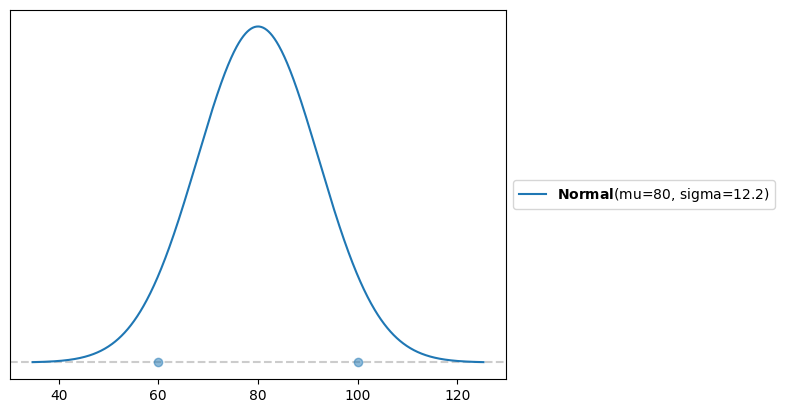

In [12]:
pz.maxent(pz.Normal(), lower = 60, upper = 100, mass = 0.90)

# **Likelihood**

(array([  3.,   9.,  28.,  61., 141., 293., 422., 445., 408., 235.]),
 array([ 49.71 ,  54.739,  59.768,  64.797,  69.826,  74.855,  79.884,
         84.913,  89.942,  94.971, 100.   ]),
 <BarContainer object of 10 artists>)

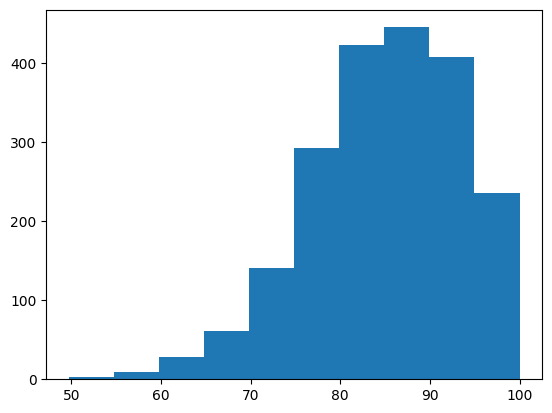

In [13]:
plt.hist(list)

Looking at this histogram, it looks like most of my games are in the 75-90% range, the mean is 84.96327139%, and 0 of my games have below 49% accuracy, so the range is from 49.71% to 100%. For this reason, I'm choosing to use the Gumbell distribution, where I can control the support.

<Axes: >

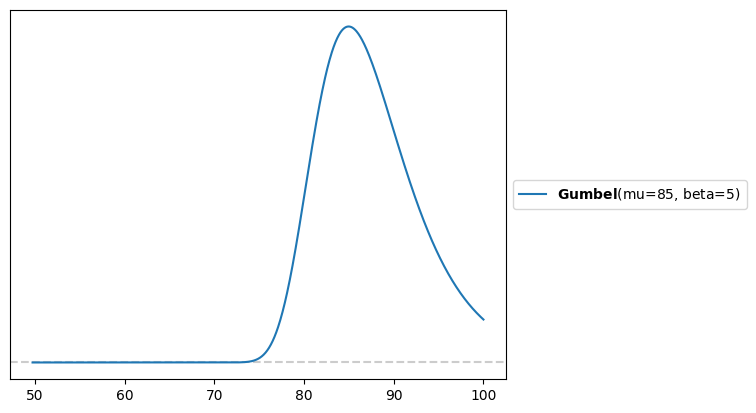

In [14]:
pz.Gumbel(mu=84.96327139,beta=5).plot_pdf(support=(49.71,100))

In [26]:
#N for normal
with pm.Model() as model_data2N:
    # The mean accuracy % of the data is 84.96327139%
    μ = pm.Gumbel('μ', mu=84.96327139,beta=5)

    #this one is new, but its exactly what it sounds like: half of a normal dist
    σ = pm.HalfNormal('σ', sigma=5)

    #our fancy new likelihood, with two priors
    Y = pm.Normal('Y', mu = μ, sigma = σ, observed=list)
    idata_data2N = pm.sample(1000)

Output()

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

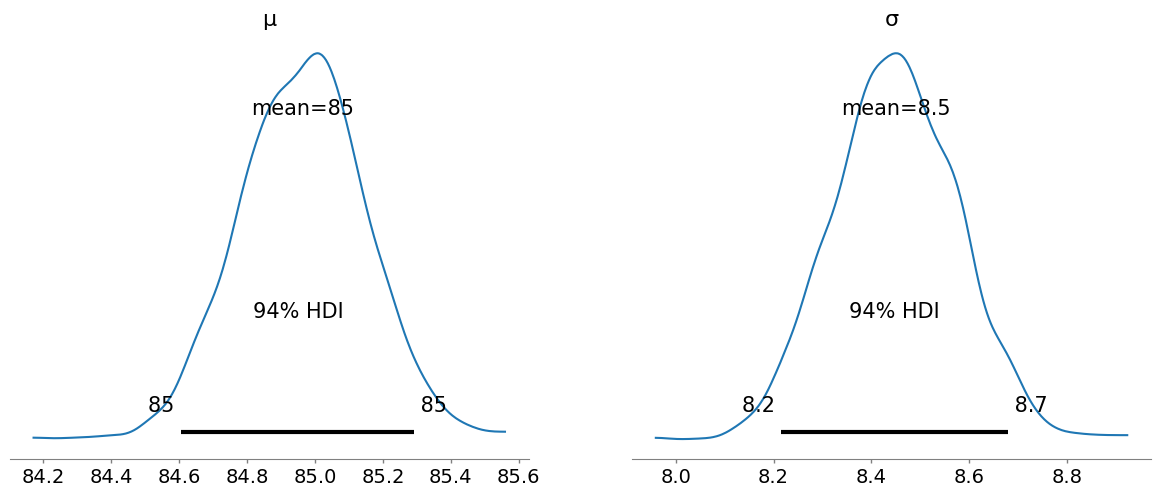

In [16]:
az.plot_posterior(idata_data2N)

array([[<Axes: >, None],
       [<Axes: xlabel='μ', ylabel='σ'>, <Axes: >]], dtype=object)

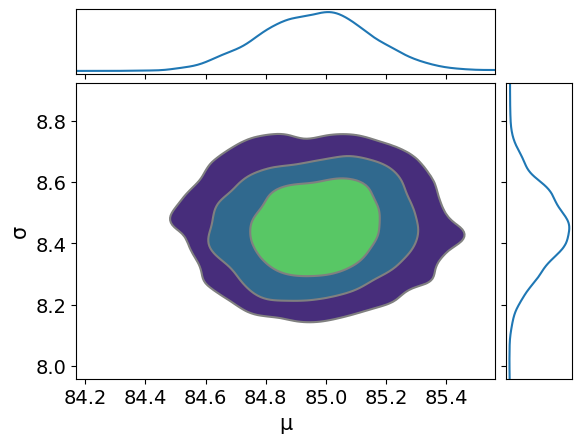

In [17]:
az.plot_pair(idata_data2N, kind='kde', marginals=True)

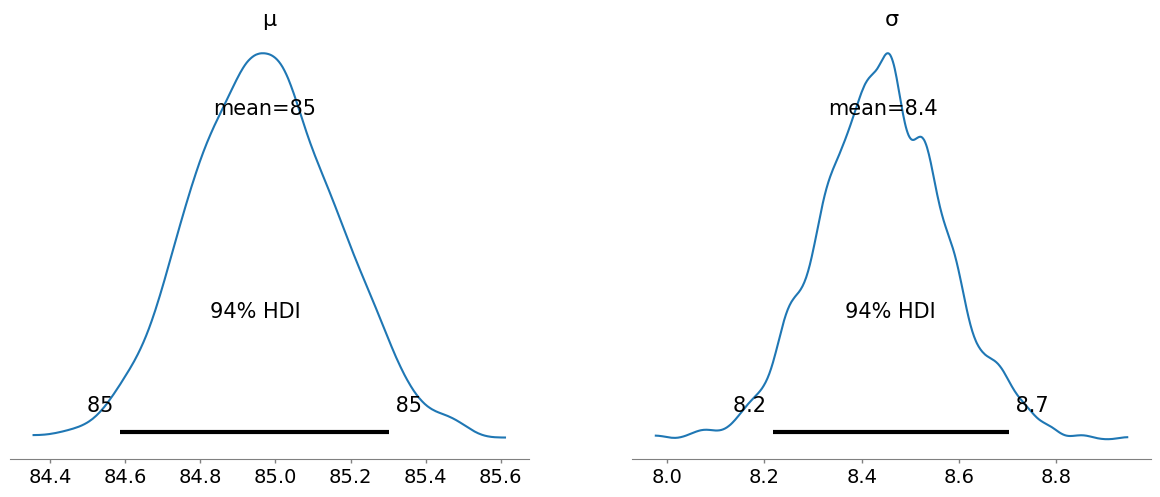

In [31]:
ppc=az.plot_posterior(idata_data2N)

In [35]:
pm.sample_posterior_predictive(idata_data2N, model=model_data2N, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

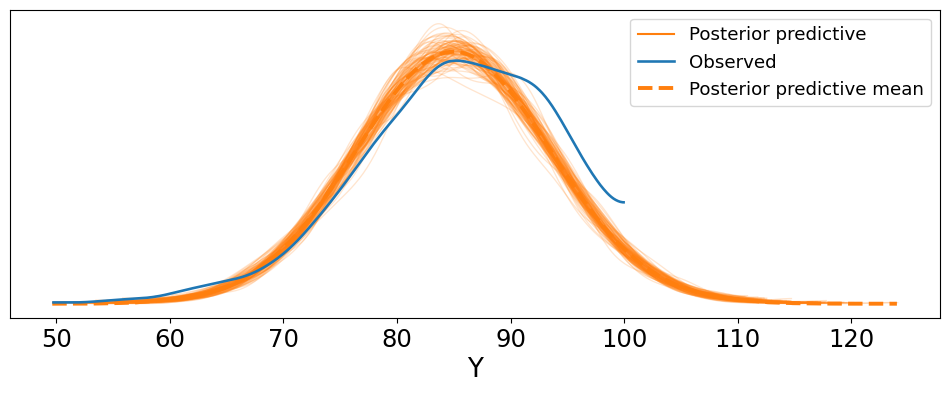

In [36]:
az.plot_ppc(idata_data2N, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])


# **2nd Likelihood - Beta Distribution**
Since the Beta Distribution goes from 0 to 1, I decided to use this distribution, converting percentages to their decimals out of 1.

In [59]:
observed_accuracy = np.array(list) / 100.0
# Add a small epsilon to observed data to avoid values exactly at 0 or 1 for Beta likelihood
epsilon = 1e-5
observed_accuracy = np.clip(observed_accuracy, epsilon, 1 - epsilon)

(used ai to figure out code to convert to percentages)

In [39]:
observed_accuracy

array([1.    , 1.    , 1.    , ..., 0.5444, 0.5394, 0.4971])

use gemini to find sigma value

In [61]:
mean_accuracy = np.mean(observed_accuracy)
std_accuracy = np.std(observed_accuracy)

print(f"Mean accuracy: {mean_accuracy}")
print(f"Standard deviation of accuracy: {std_accuracy}")

# GEMINI

variance_accuracy = std_accuracy**2


Mean accuracy: 0.8496326601466994
Standard deviation of accuracy: 0.08445288202316707


<Axes: >

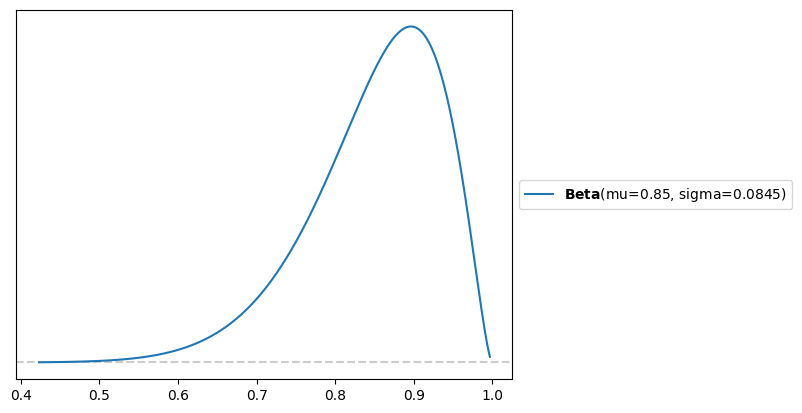

In [46]:
pz.Beta(mu=.8496327139,sigma=0.08445297779187967).plot_pdf()

In [62]:
with pm.Model() as model_data2N:
    # The mean accuracy % of the data is 84.96327139%
    μ = pm.Beta('μ', alpha=alpha_est, beta=beta_est)

    #this one is new, but its exactly what it sounds like: half of a normal dist
    σ = pm.HalfNormal('σ', sigma=std_accuracy) # Use std of data as initial sigma prior

    #our fancy new likelihood, with two priors, GEMINI HELP
    Y = pm.Beta('Y', mu=μ, sigma=σ, observed=observed_accuracy)
    idata_data2N = pm.sample(1000, initvals={'μ': mean_accuracy, 'σ': std_accuracy}) # Provide explicit initial values

Output()

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

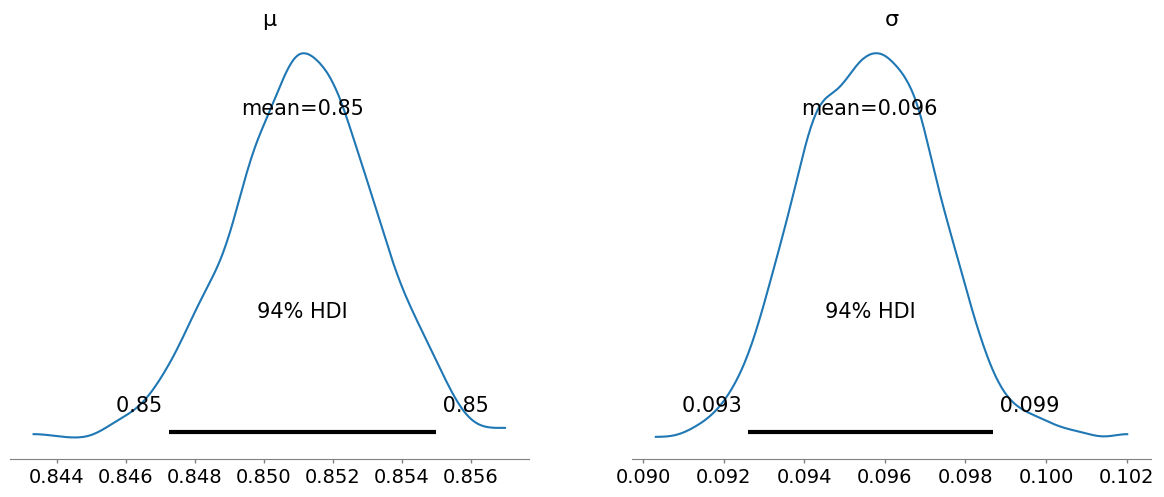

In [63]:
az.plot_posterior(idata_data2N)

In [64]:
pm.sample_posterior_predictive(idata_data2N, model=model_data2N, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

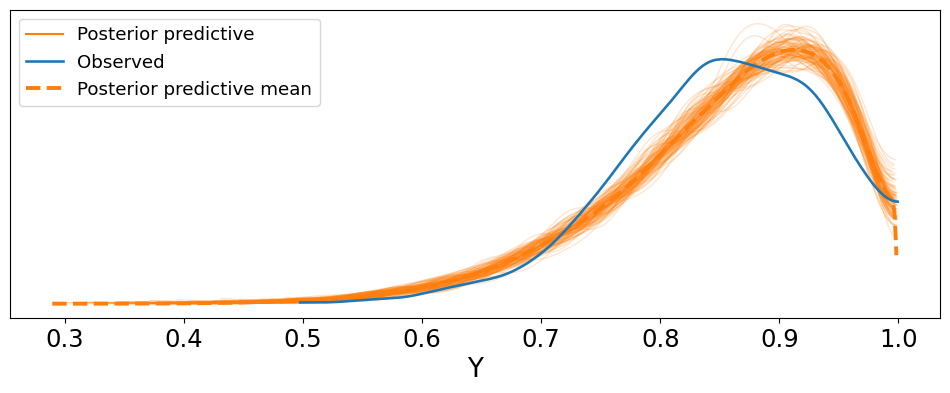

In [65]:
az.plot_ppc(idata_data2N, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])


In [67]:
az.summary(idata_data2N, var_names=['μ']) # GEMINI

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
μ,0.851,0.002,0.847,0.855,0.0,0.0,1111.0,980.0,1.0


# **Conclusion**
In conclusion, the Beta likelihood worked out better because it dealt in values only frmo 0 to 1, making it more usable for percentages. The mean predicted is slightly higher than it was in the observed data which does make sense, as going towards the future my accuracy will likely get higher with more experience.